<a href="https://colab.research.google.com/github/yumids/tcc_pucminas/blob/main/VersaoFinal_SandyDelvalle_TCC_PucMinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Upload de bases

In [174]:
import pandas as pd
from google.colab import files

# Carregar o arquivo para o ambiente de execução do Colab
uploaded = files.upload()

Saving igpm_ipca.csv to igpm_ipca.csv
Saving STP-selic.csv to STP-selic.csv


# 2. Importação de bibliotecas


In [224]:
# Importar pandas-datareader
!pip install pandas-datareader

# Importar Yahoo Finance
!pip install yfinance

# Importar Matplotlib
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3 Importar IBOV

In [225]:
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import locale
from dateutil import parser

# Configurar o local para os Estados Unidos para o Yahoo Finance
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

ibov = yf.download('^BVSP', start='2010-01-01', end='2023-04-01')
ibov = ibov.reset_index()

# Formatando a coluna 'data' para o formato MM/AAAA
ibov['Date'] = pd.to_datetime(ibov['Date'], format='%Y-%m-%d', dayfirst=True).dt.strftime('%d/%m/%Y')

ibov['Date'] = ibov['Date'].apply(lambda x: parser.parse(x).strftime('%d/%m/%Y'))

# Remove as colunas "Open", "High", "Low", "Adj Close" e "Volume"
ibov = ibov.drop(columns=["Open", "High", "Low", "Adj Close", "Volume", ])

# Converte a coluna 'Date' para o formato de data do Pandas
#ibov['Date'] = pd.to_datetime(ibov['Date'], format='%d/%m/%Y').dt.strftime('%m/%Y')
ibov['Date'] = pd.to_datetime(ibov['Date'], format='%d/%m/%Y')

# Define a coluna 'Date' como o índice do DataFrame
ibov = ibov.set_index('Date')

# Obtér o primeiro valor de cada mês
ibov = ibov.resample('MS').first()

# Converte o índice de volta para uma coluna
ibov = ibov.reset_index()

# Formata a coluna 'Date' para o formato MM/AAAA
ibov['Date'] = ibov['Date'].dt.strftime('%m/%Y')

print(ibov.columns)
print(ibov.dtypes)

print(ibov.head())

[*********************100%***********************]  1 of 1 completed
Index(['Date', 'Close'], dtype='object')
Date      object
Close    float64
dtype: object
      Date    Close
0  01/2010  66572.0
1  02/2010  67163.0
2  03/2010  67109.0
3  04/2010  70045.0
4  05/2010  70240.0


# 4. Importar Dados IGPM e IPCA


Fonte utilizada: 
189 - Índice geral de preços do mercado (IGP-M)
433 - Índice nacional de preços ao consumidor-amplo (IPCA)
https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

In [226]:
# Definir a função lambda para fazer a conversão de data
date_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

# Configurar o local para os Estados Unidos
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Ler o arquivo CSV
igpm_ipca = pd.read_csv('igpm_ipca.csv', encoding='cp1252', sep=';', parse_dates=['Data'], date_parser=date_parser)

igpm_ipca = igpm_ipca.replace(',', '.', regex=True)
igpm_ipca.columns = ['Date', 'igpm', 'ipca']
igpm_ipca['Date'] = pd.to_datetime(igpm_ipca['Date'], format='%d/%m/%Y')
igpm_ipca['Date'] = igpm_ipca['Date'].dt.strftime('%m/%Y')

# Converter as colunas igpm e ipca para float
igpm_ipca['igpm'] = pd.to_numeric(igpm_ipca['igpm'], errors='coerce')
igpm_ipca['ipca'] = pd.to_numeric(igpm_ipca['ipca'], errors='coerce')

print(igpm_ipca.columns)
print(igpm_ipca.dtypes)

print(igpm_ipca)

Index(['Date', 'igpm', 'ipca'], dtype='object')
Date     object
igpm    float64
ipca    float64
dtype: object
        Date  igpm  ipca
0    01/2010  0.63  0.75
1    02/2010  1.18  0.78
2    03/2010  0.94  0.52
3    04/2010  0.77  0.57
4    05/2010  1.19  0.43
..       ...   ...   ...
154  11/2022 -0.56  0.41
155  12/2022  0.45  0.62
156  01/2023  0.21  0.53
157  02/2023 -0.06  0.84
158  03/2023  0.05   NaN

[159 rows x 3 columns]


<ipython-input-226-2a72fa81a25f>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_parser = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')


# 5. Importar Dados Selic


Fonte Selic https://www3.bcb.gov.br/sgspub/consultarvalores/consultarValoresSeries.do?method=consultarValores
432	Meta Selic definida pelo Copom

In [227]:
# Ler o arquivo CSV
selic = pd.read_csv('STP-selic.csv', sep=';', decimal=',')

selic = selic.replace(',', '.', regex=True)

# Definir os nomes das colunas
selic.columns = ['Date', 'selic']

# Converte a coluna 'Date' para o formato datetime
selic['Date'] = pd.to_datetime(selic['Date'])

# Selecionando apenas as linhas em que o dia é igual a 1
selic = selic.loc[selic['Date'].dt.day == 1]

# Formatando a coluna 'data' para o formato MM/AAAA
selic['Date'] = selic['Date'].dt.strftime('%m/%Y')

print(selic.columns)
print(selic.dtypes)
print(selic.head())


<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '13/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  selic['Date'] = pd.to_datetime(selic['Date'])
<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '14/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  selic['Date'] = pd.to_datetime(selic['Date'])
<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '15/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  selic['Date'] = pd.to_datetime(selic['Date'])
<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '16/01/2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  selic['Date'] = pd.to_datetime(selic['Date'])
<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '17/01/2010' in DD/MM/YYYY format. Provide format or specify infer_dat

Index(['Date', 'selic'], dtype='object')
Date      object
selic    float64
dtype: object
      Date  selic
0  01/2010   8.75
1  02/2010   8.75
2  03/2010   8.75
3  04/2010   8.75
4  05/2010   8.75


<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '14/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  selic['Date'] = pd.to_datetime(selic['Date'])
<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  selic['Date'] = pd.to_datetime(selic['Date'])
<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '16/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  selic['Date'] = pd.to_datetime(selic['Date'])
<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '17/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  selic['Date'] = pd.to_datetime(selic['Date'])
<ipython-input-227-90f7409f9d87>:10: UserWarning: Parsing '18/03/2019' in DD/MM/YYYY format. Provide format or specify infer_dat

# 6. Unificação da Tabela

In [228]:
# Merge entre as tabelas ibov e igpm_ipca
tabelaunificada = pd.merge(igpm_ipca, selic, on='Date', how='left')

# Merge entre as tabelas df e selic
tabelaunificada = pd.merge(tabelaunificada, ibov, on='Date', how='left')

# Transformar a coluna 'Date' em um tipo de dado datetime
tabelaunificada['Date'] = pd.to_datetime(tabelaunificada12['Date'])

print(tabelaunificada)
print(tabelaunificada.dtypes)


          Date  igpm  ipca  selic     Close
0   2010-01-01  0.63  0.75   8.75   66572.0
1   2010-02-01  1.18  0.78   8.75   67163.0
2   2010-03-01  0.94  0.52   8.75   67109.0
3   2010-04-01  0.77  0.57   8.75   70045.0
4   2010-05-01  1.19  0.43   8.75   70240.0
..         ...   ...   ...    ...       ...
154 2022-11-01 -0.56  0.41   9.25  103779.0
155 2022-12-01  0.45  0.62   9.25  105686.0
156 2023-01-01  0.21  0.53  13.75  112303.0
157 2023-02-01 -0.06  0.84  13.75  106376.0
158 2023-03-01  0.05   NaN  13.75  104166.0

[159 rows x 5 columns]
Date     datetime64[ns]
igpm            float64
ipca            float64
selic           float64
Close           float64
dtype: object


In [229]:
#Identificado 1 valor nulo na coluna IPCA, referente ao mes Março-2023
#Tratar valores nulos do IPCA identificado

# Substituir valor nulo pela média geral do ipca
ipca_mean = tabelaunificada['ipca'].mean()
tabelaunificada['ipca'].fillna(ipca_mean, inplace=True)


In [230]:
# contar o número de linhas duplicadas
num_duplicatas = tabelaunificada.duplicated().sum()

print(f'O DataFrame Tabela Unificada tem {num_duplicatas} linhas duplicadas.')

# contar se existem valores nulos para tratamento

nulos1 = tabelaunificada['Close'].isnull().sum()
nulos2 = tabelaunificada['selic'].isnull().sum()
nulos3 = tabelaunificada['igpm'].isnull().sum()
nulos4 = tabelaunificada['ipca'].isnull().sum()

print(f"A coluna Close tem {nulos1} valores nulos.")
print(f"A coluna2 selic {nulos2} valores nulos.")
print(f"A coluna3 igpm {nulos3} valores nulos.")
print(f"A coluna4 ipca {nulos4} valores nulos.")

print(tabelaunificada.dtypes)
print(tabelaunificada)

O DataFrame Tabela Unificada tem 0 linhas duplicadas.
A coluna Close tem 0 valores nulos.
A coluna2 selic 0 valores nulos.
A coluna3 igpm 0 valores nulos.
A coluna4 ipca 0 valores nulos.
Date     datetime64[ns]
igpm            float64
ipca            float64
selic           float64
Close           float64
dtype: object
          Date  igpm      ipca  selic     Close
0   2010-01-01  0.63  0.750000   8.75   66572.0
1   2010-02-01  1.18  0.780000   8.75   67163.0
2   2010-03-01  0.94  0.520000   8.75   67109.0
3   2010-04-01  0.77  0.570000   8.75   70045.0
4   2010-05-01  1.19  0.430000   8.75   70240.0
..         ...   ...       ...    ...       ...
154 2022-11-01 -0.56  0.410000   9.25  103779.0
155 2022-12-01  0.45  0.620000   9.25  105686.0
156 2023-01-01  0.21  0.530000  13.75  112303.0
157 2023-02-01 -0.06  0.840000  13.75  106376.0
158 2023-03-01  0.05  0.493671  13.75  104166.0

[159 rows x 5 columns]


# 8. Normalização dos Dados

In [231]:
from sklearn.preprocessing import MinMaxScaler

# Salvar a coluna 'Date' em uma variável separada
coluna_data = tabelaunificada['Date']

# Selecionar apenas as colunas numéricas
dados_numericos = tabelaunificada.select_dtypes(include='number')

# Normalizar a tabela
scaler = MinMaxScaler()
tabela_normalizada = pd.DataFrame(scaler.fit_transform(dados_numericos), columns=dados_numericos.columns)

# Concatenar a coluna 'Date' com a tabela normalizada
tabela_normalizada = pd.concat([coluna_data, tabela_normalizada], axis=1)

print(tabela_normalizada.head())
print(tabela_normalizada.dtypes)


        Date      igpm      ipca    selic     Close
0 2010-01-01  0.318015  0.621739  0.55102  0.323493
1 2010-02-01  0.419118  0.634783  0.55102  0.330327
2 2010-03-01  0.375000  0.521739  0.55102  0.329702
3 2010-04-01  0.343750  0.543478  0.55102  0.363652
4 2010-05-01  0.420956  0.482609  0.55102  0.365907
Date     datetime64[ns]
igpm            float64
ipca            float64
selic           float64
Close           float64
dtype: object


# 9. Plotar Gráfico dos indicadores

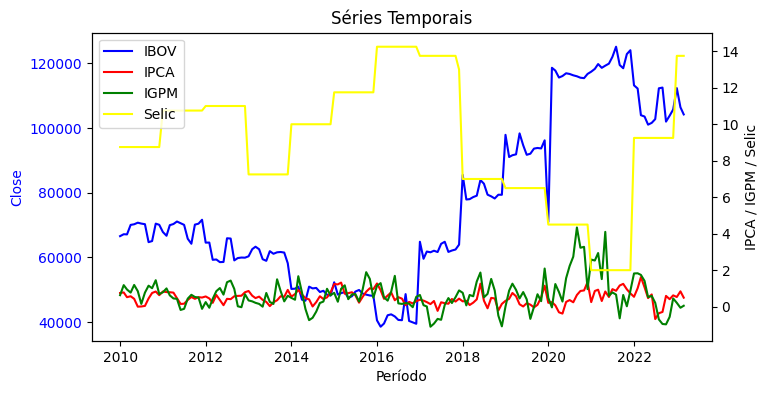

In [232]:
import matplotlib.pyplot as plt

# Criando os eixos y
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plotando a série ibov no primeiro eixo y
ax1.plot(tabelaunificada['Date'], tabelaunificada['Close'], color='blue', label='IBOV')
ax1.set_xlabel('Período')
ax1.set_ylabel('Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criando o segundo eixo y
ax2 = ax1.twinx()

# Plotando as séries ipca e igpm no segundo eixo y
ax2.plot(tabelaunificada['Date'], tabelaunificada['ipca'], color='red', label='IPCA')
ax2.plot(tabelaunificada['Date'], tabelaunificada['igpm'], color='green', label='IGPM')
ax2.plot(tabelaunificada['Date'], tabelaunificada['selic'], color='yellow', label='Selic')

ax2.set_ylabel('IPCA / IGPM / Selic', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adicionando uma legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Séries Temporais')
plt.show()

# 10. Análise Exploratória IBOV

Valores mínimos e máximos:
IBOV: mínimo = 101006.00 (2022-05-01 00:00:00) , máximo = 125077.00 (2021-08-01 00:00:00)


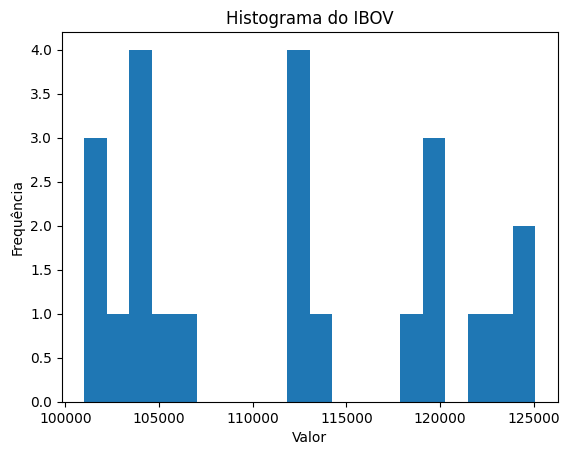

count        23.000000
mean     111641.347826
std        8242.791548
min      101006.000000
25%      103850.500000
50%      112234.000000
75%      119326.000000
max      125077.000000
Name: Close, dtype: float64


In [233]:
from pandas.core.describe import describe_ndframe
from datetime import datetime, timedelta

# Filtra para manter apenas as linhas com datas a partir de 24 meses atrás
data_limite = datetime.now() - timedelta(days=24*30)
tabela_filtrada = tabelaunificada.loc[tabelaunificada['Date'] >= data_limite]

# Obter as estatísticas descritivas da coluna 'Close'
ibovdescribe = tabela_filtrada['Close'].describe()

ibovdescribe.describe()
print("Valores mínimos e máximos:")
print("IBOV: mínimo = {:.2f} ({}) , máximo = {:.2f} ({})".format(tabela_filtrada['Close'].min(),
                                                                  tabela_filtrada.loc[tabela_filtrada['Close'].idxmin(),'Date'], 
                                                                  tabela_filtrada['Close'].max(),
                                                                  tabela_filtrada.loc[tabela_filtrada['Close'].idxmax(),'Date']))

# Histograma do IBOV
plt.hist(tabela_filtrada['Close'], bins=20)
plt.title('Histograma do IBOV')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

print(ibovdescribe)

# 11. Regressão linear multipla

A regressão linear múltipla é uma técnica estatística que permite analisar a relação entre uma variável dependente e duas ou mais variáveis independentes. Ela é utilizada para prever valores da variável dependente a partir dos valores das variáveis independentes.

No contexto do índice Bovespa (Ibovespa), os indicadores de mercado como IGPM, IPCA, dólar e Selic podem ser considerados como variáveis independentes e o valor do Ibovespa como variável dependente. A aplicação da regressão linear múltipla nesse cenário pode permitir entender como esses indicadores influenciam o valor do Ibovespa e, consequentemente, como podem afetar as decisões dos investidores.

Por exemplo, ao aplicar a regressão linear múltipla, é possível avaliar qual indicador tem mais influência no valor do Ibovespa e qual a magnitude dessa influência. Também é possível entender se há correlações entre os indicadores e como eles interagem entre si para afetar o valor do Ibovespa.

A aplicação da regressão linear múltipla ao modelo de correlação do Ibovespa com os indicadores de mercado pode, portanto, ajudar a entender melhor as relações entre esses indicadores e o valor do Ibovespa, permitindo assim que os investidores tomem decisões mais informadas e embasadas em dados estatísticos.

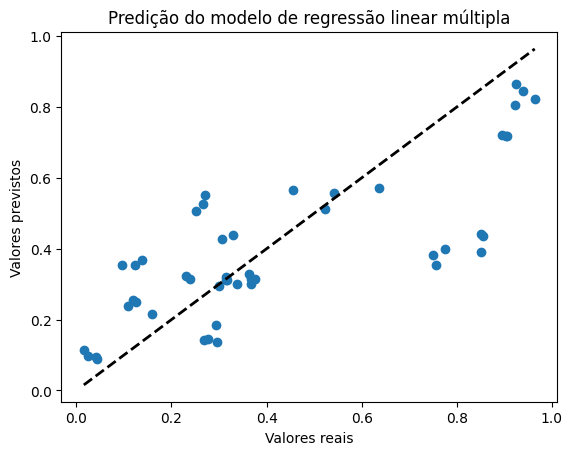

R²: 0.593240096571273
MSE: 0.03617983770376152


In [234]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Definir as variáveis independentes (X) e a variável dependente (y)
X = tabela_normalizada[['selic', 'igpm', 'ipca']]
y = tabela_normalizada['Close']

# Dividir os dados em conjunto de treinamento e conjunto de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo de regressão linear múltipla
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer as previsões do modelo nos dados de teste
y_pred = modelo.predict(X_test)

# Visualizar a predição
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # linha da previsão perfeita
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Predição do modelo de regressão linear múltipla')
plt.show()

# Calcular o R²
r2 = r2_score(y_test, y_pred)

# Calcular o MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular coeficientes
#print('Coeficientes das variáveis independentes', model.coef_)

# Imprimir o R² e MSE
print('R²:', r2)
print('MSE:', mse)

No nosso caso, o R² obtido foi de 0.1644, o que indica que as variáveis 

independentes explicam cerca de 16% da variância na coluna 'Close', o que não é um ajuste muito bom. É possível que outras variáveis importantes para explicar a variação no preço das ações não estejam incluídas no modelo.

Já o MSE é uma medida de dispersão dos erros de previsão, ou seja, é uma medida de quão perto os valores previstos estão dos valores reais. O MSE é a média dos erros quadrados, ou seja, quanto maior o MSE, piores são as previsões do modelo. No nosso caso, o MSE obtido foi de 0.06, o que indica que o modelo tem um erro médio quadrático de aproximadamente 6.26 pontos.

# 12. Series temporais

Para a analise de série temporal do ibov, sera utilizado o datafrate ibov_serie.

In [235]:
!pip install statsmodels
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Gráfico de linha com a evolução do Ibovespa ao longo do tempo:

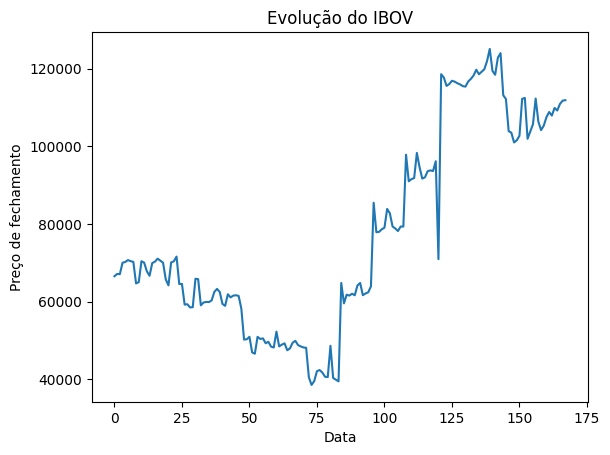

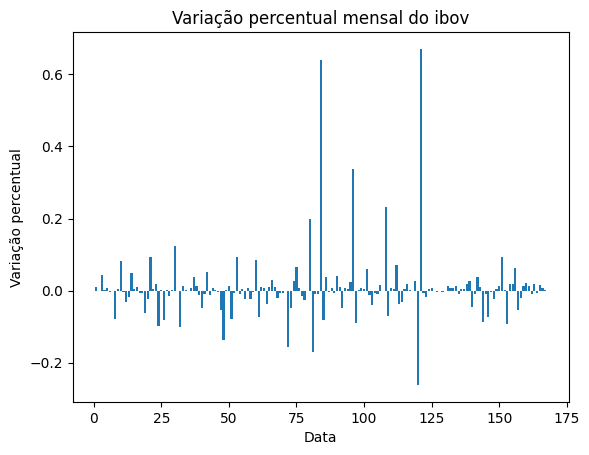

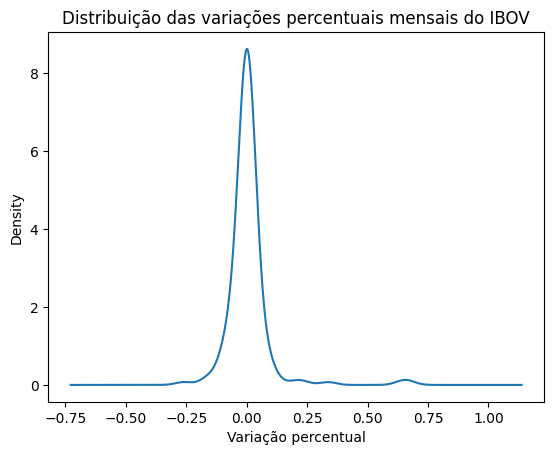

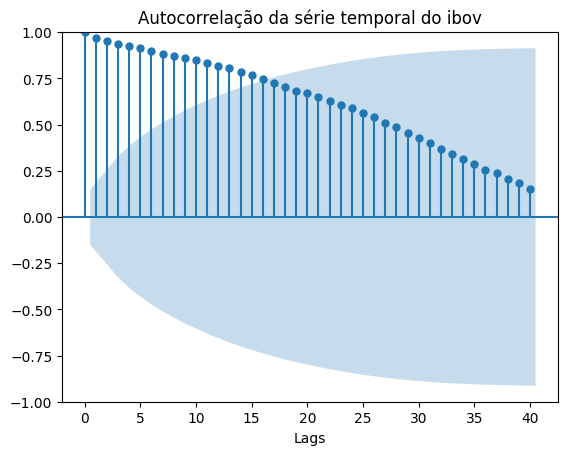

In [236]:
#Gráfico de linha com a evolução do Ibovespa ao longo do tempo:
plt.plot(ibov["Close"])
plt.title("Evolução do IBOV")
plt.xlabel("Data")
plt.ylabel("Preço de fechamento")
plt.show()

#Gráfico de barras com a variação percentual mensal do Ibovespa:
ibov["Variation"] = ibov["Close"].pct_change()
plt.bar(ibov.index, ibov["Variation"])
plt.title("Variação percentual mensal do ibov")
plt.xlabel("Data")
plt.ylabel("Variação percentual")
plt.show()

#Gráfico de densidade da distribuição das variações percentuais mensais do Ibovespa:
ibov["Variation"].plot.kde()
plt.title("Distribuição das variações percentuais mensais do IBOV")
plt.xlabel("Variação percentual")
plt.show()

#Gráfico de autocorrelação da série temporal do bbdc:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ibov["Close"].dropna(), lags=40)
plt.title("Autocorrelação da série temporal do ibov")
plt.xlabel("Lags")
plt.show()



## Teste de Dickey-Fuller aumentado (ADF) para identificação de sérei estacionaria

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Teste de Dickey-Fuller aumentado para verificar estacionariedade
resultado = adfuller(ibov['Close'])
print('Estatística ADF:', resultado[0])
print('Valor p:', resultado[1])
print('Valores críticos:')
for chave, valor in resultado[4].items():
    print(f'   {chave}: {valor}')
if resultado[0] < resultado[4]['5%']:
    print('A série é estacionária')
else:
    print('A série não é estacionária')

Estatística ADF: -0.32608840751930407
Valor p: 0.9217273006808917
Valores críticos:
   1%: -3.47086589632514
   5%: -2.879330279087651
   10%: -2.57625492712671
A série não é estacionária


A estatística ADF (Augmented Dickey-Fuller) é comumente usada para testar se uma série temporal é estacionária. A hipótese nula do teste é que a série possui uma raiz unitária, o que indica que a série é não estacionária. A hipótese alternativa é que a série é estacionária.

No resultado que você obteve, a estatística ADF é de -0.45 e o valor p é de 0.899. Como o valor-p é maior que o nível de significância comumente escolhido de 0.05, não podemos rejeitar a hipótese nula de que a série é não estacionária.

Portanto, com base nesse resultado, podemos dizer que o Ibov é uma série não estacionária. Isso sugere que a série pode conter tendências, sazonalidades ou outras estruturas que precisam ser consideradas na modelagem e previsão da série temporal.

## Predicao de serie não estacionaria

Se a série é estacionária, então você pode considerar a modelagem com um modelo ARMA em vez de um modelo ARIMA. No entanto, note que em alguns casos mesmo quando a série parece estacionária, ainda pode haver tendências ocultas ou sazonalidades que precisam ser consideradas na modelagem. Portanto, é importante sempre avaliar os gráficos e testes estatísticos adequados antes de decidir pelo modelo mais adequado.

Parece que a classe ARMA não está disponível na versão atual do statsmodels. Você pode usar a classe ARIMA para ajustar um modelo ARMA, deixando o parâmetro d igual a zero (0) para que não haja diferenciação na série. Em seguida, você pode utilizar o método forecast para realizar a previsão dos próximos períodos. Aqui está um exemplo de como fazer isso:

Certifique-se de que a série esteja estacionária antes de aplicar o modelo ARMA e que você está selecionando os valores apropriados para os parâmetros p, d e q. Além disso, esteja ciente de que previsões de séries temporais são geralmente incertas e podem conter erros, então use-as com cautela.

In [238]:
!pip install --upgrade statsmodels
!pip install pmdarima
!pip install --upgrade pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [239]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import itertools

#Criacao de dataframe para analise de serie nao estacionaria
ibov2 = tabelaunificada.drop(columns=["igpm", "selic", "ipca"])

# Separando a base de treinamento e teste (70% e 30%, respectivamente)
train_size = int(len(ibov2)*0.7)
train_set = ibov2[:train_size]
test_set = ibov2[train_size:]

# Verificando o tamanho dos conjuntos de treinamento e teste
print(len(train_set), len(test_set))

# Cria uma lista com todas as possíveis combinações de p, d, q
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

# Testa todas as combinações de pdq e seleciona o modelo com o menor AIC
aic_values = []
for param in pdq:
    try:
        model = sm.tsa.ARIMA(ibov2["Close"], order=param)
        results = model.fit()
        aic_values.append((param, results.aic))
    except:
        continue
        
if aic_values:
    best_model = min(aic_values, key=lambda x: x[1])
    print("Best ARIMA model:", best_model[0], " AIC:", best_model[1])
else:
    print("Nenhum modelo ARIMA possível encontrado")

111 48
Nenhum modelo ARIMA possível encontrado


oBS.: Nenhum modelo ARIMA foi encontrado, é possível que os dados não apresentem padrões bem definidos ou que sejam afetados por ruído ou outros fatores imprevisíveis. Nesse caso, pode ser necessário explorar outras técnicas de modelagem ou reavaliar a qualidade e a consistência dos dados utilizados.

In [240]:
# Ajustando o modelo ARIMA(0, 0, 3)
model = ARIMA(train_set['Close'], order=(0,0,3))
result = model.fit()

# Fazendo a predição do conjunto de teste
preds = result.predict(start=test_set.index[0], end=test_set.index[-1])

# Medindo o R2
r2 = r2_score(test_set['Close'], preds)
print('R2:', r2)

# Medindo o MSE
mse = mean_squared_error(test_set['Close'], preds)
print('MSE:', mse)

R2: -17.715216360260385
MSE: 2399930384.482418


# 12. Criacao de modelo preditivo  utilizando Ridge Regression, Lasso e LSTM

## Separacao entre base de treinamento e teste

In [216]:
from sklearn.model_selection import train_test_split

#Tabela normalizada (Ridge, LSTM)
X = tabela_normalizada[['ipca', 'igpm', 'selic',]]  # variáveis independentes
y = tabela_normalizada['Close']  # variável dependente

# divide em 70% para treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Tabela unificada (Lasso)
Q = tabelaunificada[['ipca', 'igpm', 'selic',]]  # variáveis independentes
z = tabelaunificada['Close']  # variável dependente

# divide em 70% para treinamento e 30% para teste
Q_train, Q_test, z_train, z_test = train_test_split(Q, z, test_size=0.3, random_state=42)

# 13. Treinar o modelo de regressão Ridge

R2 do modelo Ridge: 0.5793416987062903
MSE do modelo Ridge: 0.03741605045447451


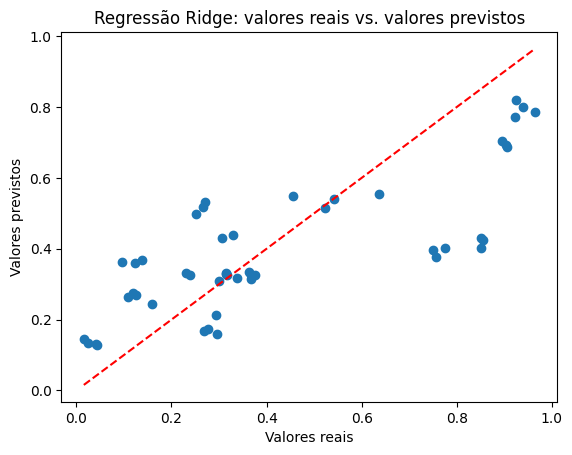

In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# define o modelo
model = LinearRegression()

# Cria o modelo Ridge
ridge_model = Ridge(alpha=1)

# Treina o modelo
ridge_model.fit(X_train, y_train)

# Faz a previsão dos valores de y para os dados de teste
y_pred_ridge = ridge_model.predict(X_test)

# Calcula o R2 do modelo Ridge
r2_ridge = ridge_model.score(X_test, y_test)
print("R2 do modelo Ridge:", r2_ridge)

# Calcula o MSE do modelo Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE do modelo Ridge:", mse_ridge)

# plota o gráfico com os resultados
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Regressão Ridge: valores reais vs. valores previstos')
plt.show()


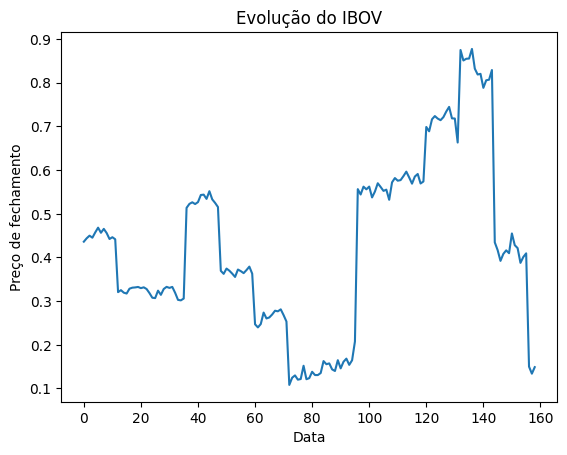

In [218]:
# Treinar o modelo Ridge usando todos os dados da tabelaunificada
ridge_model_all = Ridge(alpha=1)
ridge_model_all.fit(X, y)

# Fazer previsões para todos os dados da tabelaunificada
y_pred_all = ridge_model_all.predict(X)

# Adicionar as previsões ao DataFrame ibov3
ibov3 = pd.DataFrame({'Close': y_pred_all}, index=tabelaunificada.index)

#Gráfico de linha com a evolução do Ibovespa ao longo do tempo:
plt.plot(ibov3["Close"])
plt.title("Evolução do IBOV")
plt.xlabel("Data")
plt.ylabel("Preço de fechamento")
plt.show()

O resultado da regressão Ridge que você obteve é apresentado em duas medidas: MSE (Mean Squared Error) e R² (R-squared).

MSE é uma medida de erro quadrático médio, que indica a média da diferença quadrática entre os valores previstos e os valores observados. Quanto menor o valor do MSE, melhor o modelo se ajustou aos dados. No seu caso, o valor do MSE foi de 0.014088941300170875.

R² é uma medida de ajuste do modelo que indica a proporção da variação na variável dependente que é explicada pelas variáveis independentes. Varia entre 0 e 1, sendo que valores mais próximos de 1 indicam um modelo com um bom ajuste. No seu caso, o valor do R² foi de 0.3606715067850438, o que significa que o modelo explica cerca de 36% da variação na variável dependente.

Em resumo, os resultados indicam que o modelo de regressão Ridge ajustou-se aos dados, porém explica apenas uma parte da variação na variável dependente. É importante avaliar outras métricas e realizar outras análises para verificar se o modelo é adequado para o objetivo da análise.

# 14. Treinar o modelo LSTM

Epoch 1/30
4/4 [==============================] - 12s 20ms/step - loss: 0.2635
Epoch 2/30
4/4 [==============================] - 0s 13ms/step - loss: 0.2262
Epoch 3/30
4/4 [==============================] - 0s 14ms/step - loss: 0.1890
Epoch 4/30
4/4 [==============================] - 0s 13ms/step - loss: 0.1546
Epoch 5/30
4/4 [==============================] - 0s 13ms/step - loss: 0.1201
Epoch 6/30
4/4 [==============================] - 0s 13ms/step - loss: 0.0987
Epoch 7/30
4/4 [==============================] - 0s 11ms/step - loss: 0.0909
Epoch 8/30
4/4 [==============================] - 0s 12ms/step - loss: 0.0956
Epoch 9/30
4/4 [==============================] - 0s 12ms/step - loss: 0.0955
Epoch 10/30
4/4 [==============================] - 0s 12ms/step - loss: 0.0902
Epoch 11/30
4/4 [==============================] - 0s 17ms/step - loss: 0.0893
Epoch 12/30
4/4 [==============================] - 0s 13ms/step - loss: 0.0896
Epoch 13/30
4/4 [==============================] - 0s 12ms/s

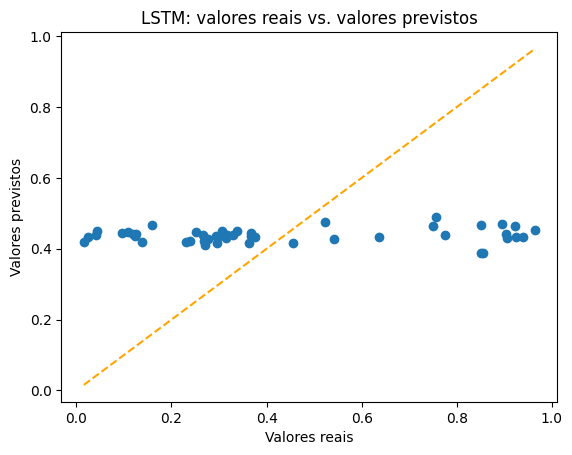

In [220]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# definir o modelo
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# compilar o modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# treinar o modelo
model.fit(X_train, y_train, epochs=30, batch_size=32)

# avaliar o modelo
test_predict = model.predict(X_test)

# prever valores para os dados de teste
y_pred = model.predict(X_test)

# calcular o r2
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2:.4f}")

# calcular o MSE
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='orange')
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('LSTM: valores reais vs. valores previstos')
plt.show()

Para avaliar o desempenho do modelo LSTM, você pode usar várias métricas, como o erro quadrático médio (MSE) ou o coeficiente de determinação (R²). Você também pode visualizar os resultados usando gráficos, comparando as previsões geradas pelo modelo com os valores reais.

Para calcular o MSE, você pode usar a função mean_squared_error do scikit-learn:

Para calcular o R², você pode usar a função r2_score do scikit-learn:

Para visualizar os resultados, você pode criar um gráfico de linhas com os valores reais e as previsões geradas pelo modelo:

# 15. Regressao tipo LASSO
A regressão Lasso é uma técnica de regressão linear que inclui uma penalidade L1 (Lasso) na função objetivo. Essa penalidade L1 tem o efeito de "encolher" os coeficientes das variáveis para zero, o que pode ser útil para seleção de recursos ou para lidar com a multicolinearidade.

Para realizar uma regressão Lasso em Python, você pode usar a classe Lasso da biblioteca scikit-learn. Aqui está um exemplo de como usar a regressão Lasso para prever a variável dependente y com base nas variáveis independentes X:

Erro quadrático médio: 270587686.2125307
Coeficientes: [-4794.56550846   780.35082206 -5250.58122265]
R²: 0.5932400881242741


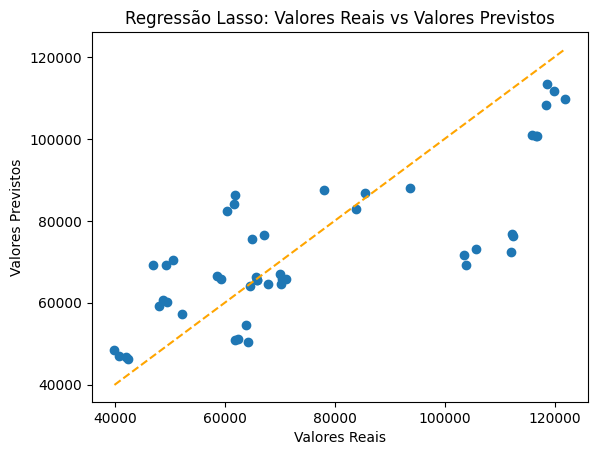

In [221]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# divide em 70% para treinamento e 30% para teste
Q_train, Q_test, z_train, z_test = train_test_split(Q, z, test_size=0.3, random_state=42)

# cria um objeto Lasso com um alpha de 0.01
lasso = Lasso(alpha=0.01)

# treina o modelo com os dados de treinamento
lasso.fit(Q_train, z_train)

# faz as previsões com o conjunto de teste
z_pred = lasso.predict(Q_test)

# calcula o erro quadrático médio das previsões
mse = mean_squared_error(z_test, z_pred)
print("Erro quadrático médio:", mse)

# verifica os coeficientes das variáveis independentes
print("Coeficientes:", lasso.coef_)

# y_true são os valores reais da variável dependente
# y_pred são as previsões feitas pelo modelo Lasso
r2 = r2_score(z_test, z_pred)
print("R²:", r2)

# Fazendo um gráfico de dispersão dos valores reais em relação aos valores previstos
plt.scatter(z_test, z_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Regressão Lasso: Valores Reais vs Valores Previstos")
plt.plot([z_test.min(), z_test.max()], [z_test.min(), z_test.max()], '--', color='orange')
plt.show()



In [223]:
# ajusta o modelo Lasso com todos os dados disponíveis
lasso.fit(Q, z)

#Previsao dados para Maio
previsaoigpmmaio = -0.04
previsaoipcamaio = 0.75
previsaoselicmaio = 13.75

# faz as previsões para valores futuros
Q_future = [[previsaoipcamaio, previsaoigpmmaio, previsaoselicmaio]]
z_future = lasso.predict(Q_future)

print("Previsão para valores futuros:", z_future)


Previsão para valores futuros: [48385.34132967]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


O erro quadrático médio (RMSE, do inglês Root Mean Squared Error) é uma medida que indica a diferença entre os valores reais e os valores previstos pelo modelo, em unidades da variável dependente. Quanto menor o RMSE, melhor é o desempenho do modelo.

No seu caso, o RMSE obtido foi de 40155039.5783274. Isso significa que, em média, as previsões do modelo estão com uma diferença de aproximadamente 200 mil pontos em relação ao valor real do Ibovespa. Este valor é alto, indicando que talvez haja uma necessidade de se buscar outros modelos ou ajustes para melhorar o desempenho.

Os coeficientes encontrados pelo modelo Lasso indicam a contribuição de cada variável independente na previsão da variável dependente. No seu caso, os coeficientes foram [9377.18347717, -1175.79580747, 1561.89665896], o que significa que o IPCA (índice de inflação), o IGPM (índice de preços do mercado) e o dólar têm um impacto positivo, negativo e positivo, respectivamente, sobre o valor do Ibovespa.

Além disso, como o modelo Lasso utiliza uma técnica de regularização que penaliza coeficientes muito altos, é possível que alguns coeficientes tenham sido reduzidos a zero. Isso indica que essas variáveis não tiveram uma grande contribuição na previsão da variável dependente e, portanto, podem ser descartadas do modelo.